In [41]:
import pandas as pd 
import numpy as np

churn = pd.read_csv(r"D:\sahil\Documents\BU\DSwithpython\Project\Finalproject\churnkaggledata.csv")

In [42]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4250 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls           

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4250 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls           

In [43]:
print("Na Values in the dataset\n" , churn.isna().sum())


Na Values in the dataset
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


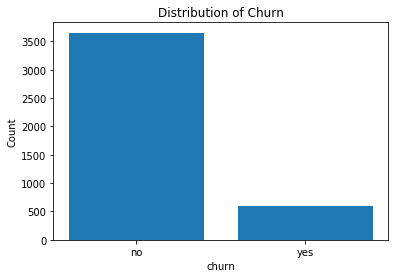

In [93]:
#Exploratory Analysis 
#Data Visualizations and some statistics
import pandas as pd
import matplotlib.pyplot as plt

data = churn

churn_counts = data['churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')
plt.show()


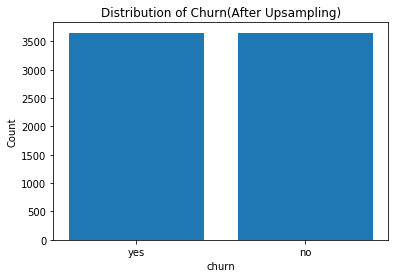

In [95]:
#Upsampling before using algorithms 

from sklearn.utils import resample

# Separate majority and minority classes
churn_majority = churn[churn['churn']=='no']
churn_minority = churn[churn['churn']=='yes']

# Upsample minority class
churn_minority_upsampled = resample(churn_minority, 
                                    replace=True,     # sample with replacement
                                    n_samples=len(churn_majority),    # to match majority class
                                    random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
churn_upsampled = pd.concat([churn_majority, churn_minority_upsampled])


#Exploratory Analysis 
#Data Visualizations and some statistics
import pandas as pd
import matplotlib.pyplot as plt

data = churn_upsampled

churn_counts = data['churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('churn')
plt.ylabel('Count')
plt.title('Distribution of Churn(After Upsampling)')
plt.show()



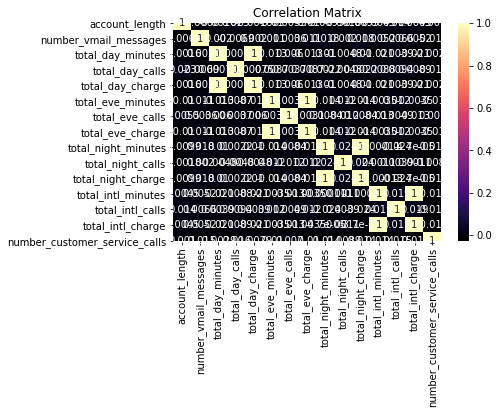

In [45]:
#Feature importance
#Seeing which features are important
import seaborn as sns
from matplotlib import pyplot as plt 


corrmatrix = churn.corr()
sns.heatmap(corrmatrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()


In [46]:
highest = corrmatrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
print("The Features which have the highest value are \n " , highest[1:] )
print("The Features which have the Lowest value are \n " , highest[-1:] )


The Features which have the highest value are 
  total_day_charge     total_day_minutes      1.000000
total_eve_minutes    total_eve_charge       1.000000
total_night_charge   total_night_minutes    0.999999
total_intl_charge    total_intl_minutes     0.999993
total_night_minutes  total_intl_calls       0.024280
                                              ...   
total_day_minutes    total_day_calls        0.000747
total_intl_minutes   total_night_minutes    0.000113
                     total_night_charge     0.000103
total_intl_charge    total_night_minutes    0.000047
total_night_charge   total_intl_charge      0.000037
Length: 105, dtype: float64
The Features which have the Lowest value are 
  total_night_charge  total_intl_charge    0.000037
dtype: float64


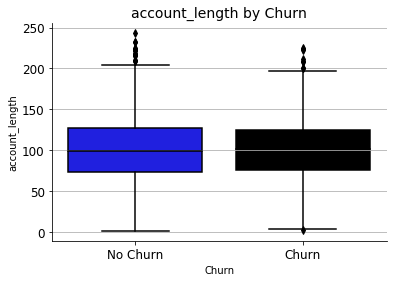

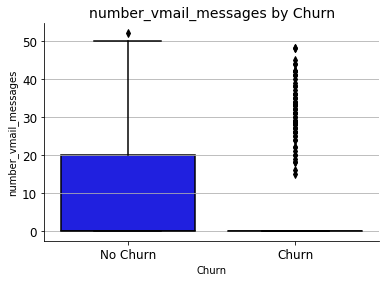

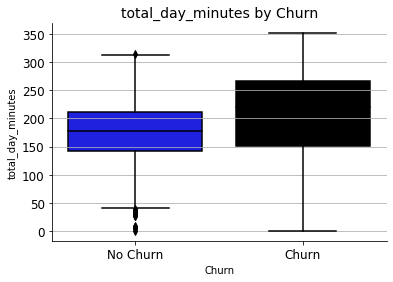

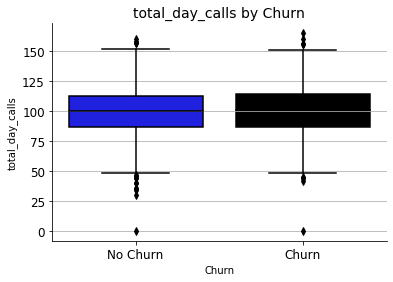

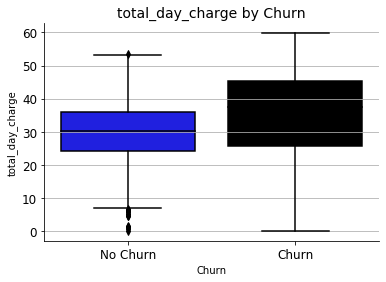

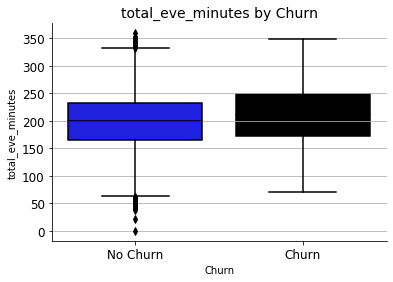

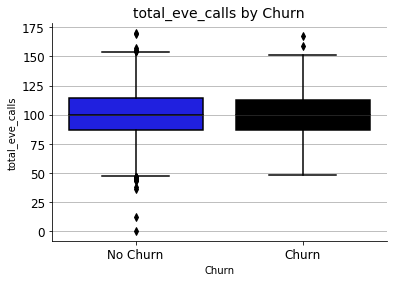

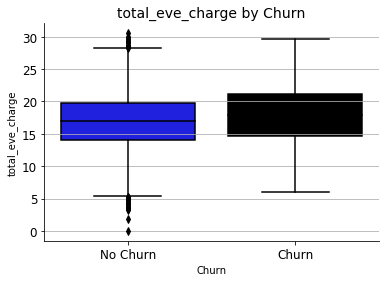

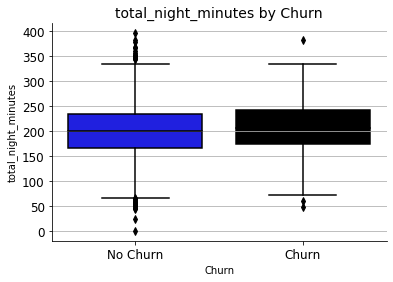

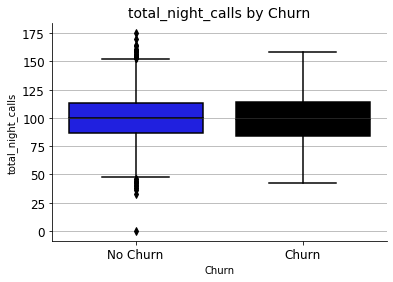

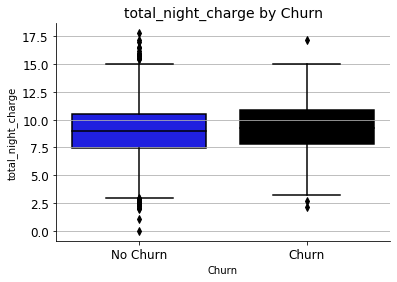

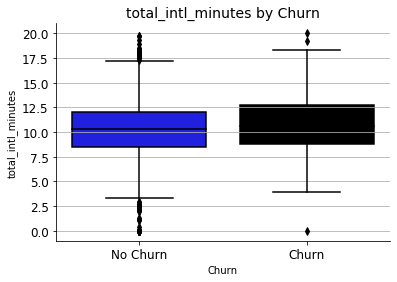

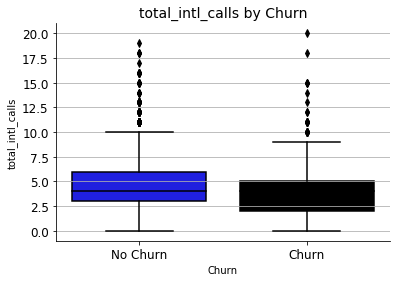

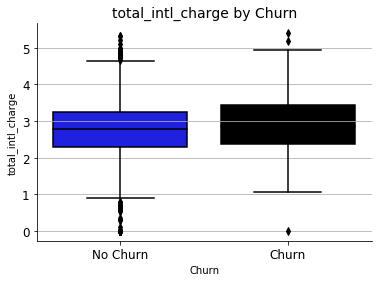

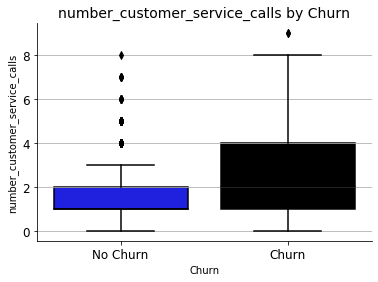

In [102]:
# Boxplots of continuous variables by target variable
continuous_vars = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

# Define custom colors
colors = ['blue', 'black']

for var in continuous_vars:
    # Create the boxplot
    ax = sns.boxplot(x='churn', y=var, data=churn, palette=colors)
    
    # Add labels and title
    ax.set_xlabel('Churn')
    ax.set_ylabel(var)
    ax.set_title(f'{var} by Churn', fontsize=14)
    
    # Customize the tick labels
    ax.set_xticklabels(['No Churn', 'Churn'], fontsize=12)
    ax.tick_params(axis='y', labelsize=12)
    
    # Add horizontal grid lines
    ax.yaxis.grid(True)
    
    # Remove the top and right spines
    sns.despine()
    
    # Show the plot
    plt.show()


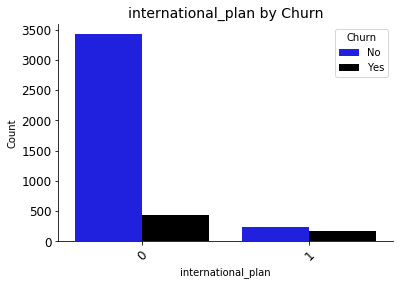

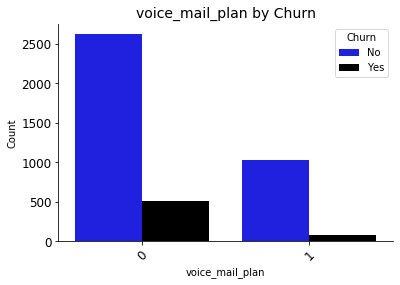

In [103]:
# Bar plots of categorical variables by target variable
categorical_vars =['international_plan','voice_mail_plan']

# Define custom colors
colors = ['blue', 'black']

for var in categorical_vars:
    # Create the countplot
    ax = sns.countplot(x=var, hue='churn', data=churn, palette=colors)
    
    # Add labels and title
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'{var} by Churn', fontsize=14)
    
    # Customize the tick labels
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='both', labelsize=12)
    
    # Add legend and remove the top and right spines
    ax.legend(title='Churn', labels=['No', 'Yes'])
    sns.despine()
    
    # Show the plot
    plt.show()


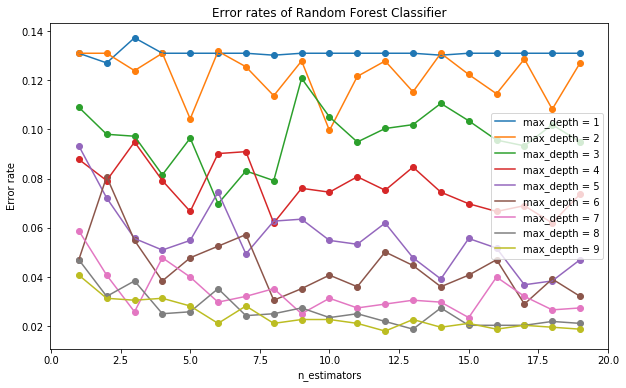

In [98]:
#Removing columns like state and area code 

#Random Forest Model on our dataset 
#Random Forest 

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix




data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls',] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3 , random_state=3)


# loop over values of N and d
Ns = range(1, 20)
ds = range(1, 10)
N_estimators = []
error_rates = []
depth = []

for N in Ns:
    for d in ds:
        model = RandomForestClassifier(n_estimators=N, max_depth=d, criterion='entropy')
        model = model.fit(X, Y)
        prediction = model.predict(X_test)
        accuracy = np.mean(prediction == Y_test)
        depth.append(d)
        N_estimators.append(N) 
        error_rates.append(1 - accuracy) 
        

plt.figure(figsize=(10, 6))
for d in ds:
    plt.plot([N_estimators[i] for i in range(len(depth)) if depth[i] == d],
             [error_rates[i] for i in range(len(depth)) if depth[i] == d], label=f"max_depth = {d}")
    plt.scatter([N_estimators[i] for i in range(len(depth)) if depth[i] == d],
             [error_rates[i] for i in range(len(depth)) if depth[i] == d], marker='o')

plt.xlabel('n_estimators')
plt.ylabel('Error rate')
plt.title('Error rates of Random Forest Classifier')
plt.legend()
plt.show()





In [100]:
#finding the optimal value of n estimators and depth 
min_error_rate = min(error_rates)
min_error_rate_index = error_rates.index(min_error_rate)
best_n = N_estimators[min_error_rate_index]
best_d = depth[min_error_rate_index]

print("Best value of n_estimators" ,best_n )
print("Best value of max_depth" ,best_d)

Best value of n_estimators 12
Best value of max_depth 9


In [101]:
#using the optimal value to predict , n = 9 , depth = 9

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 

for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features


#top_features = ['Contract', 'TotalCharges', 'tenure', 'MonthlyCharges', 'TechSupport', 'OnlineSecurity']
#features = top_features


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=3)


model = RandomForestClassifier(n_estimators=12, max_depth=9, criterion='entropy')
model = model.fit(X, Y)
prediction = model.predict(X_test)

accuracy = np.mean(prediction == Y_test)


cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Random Forest is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the Random Forest classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )




The Accuracy for Random Forest is(%):  98.0
The Confusion Matrix of the Random Forest classifier is (%):
 [[2548    0]
 [  67  360]]
TPR: 1.0
TNR: 0.84


In [51]:
#Experimenting with features 

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. total_day_minutes (0.155724)
2. number_customer_service_calls (0.149381)
3. total_day_charge (0.143266)
4. international_plan (0.100775)
5. total_eve_minutes (0.063061)
6. total_eve_charge (0.061241)
7. total_intl_minutes (0.055104)
8. total_intl_calls (0.047932)
9. total_night_charge (0.035993)
10. number_vmail_messages (0.030949)
11. total_intl_charge (0.028470)
12. voice_mail_plan (0.026579)
13. account_length (0.026099)
14. total_night_minutes (0.023619)
15. total_night_calls (0.023123)
16. total_eve_calls (0.015043)
17. total_day_calls (0.013641)


In [52]:
#Naive Bayes 

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 


# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features



#Experimenting with top 4 features of random forest 

#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features

#Dint work Accuracy decreased by 2 


X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=3)

NB_classifier = GaussianNB().fit(X_train, Y_train)
prediction = NB_classifier.predict(X_test)
accuracy = np.mean(prediction == Y_test)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Naive Bayes is(%): ", round( 100*accuracy , 2) )

print("The Confusion Matrix of the Naive Bayes classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for Naive Bayes is(%):  85.34
The Confusion Matrix of the Naive Bayes classifier is (%):
 [[2324  224]
 [ 212  215]]
TPR: 0.91
TNR: 0.5


In [55]:

#logistic Regression  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features
#dint work 

X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=3)

log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X_train, Y_train)

prediction = log_reg_classifier.predict(X_test)
accuracy = np.mean(prediction == Y_test)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Logistic Regression is(%): ",round( 100*accuracy , 2) )

print("The Confusion Matrix of the Logistic Regression classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for Logistic Regression is(%):  86.05
The Confusion Matrix of the Logistic Regression classifier is (%):
 [[2500   48]
 [ 367   60]]
TPR: 0.98
TNR: 0.14


In [64]:
#Decision Trees

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features
#Dint work 

X = data[features].values
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=3)


tree_classifier = tree.DecisionTreeClassifier(criterion='entropy')

tree_classifier = tree_classifier.fit(X_train, Y_train)

prediction = tree_classifier.predict(X_test)

accuracy = np.mean(prediction == Y_test)


cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for Decision trees is(%): ", round( 100*accuracy , 2) )

print("The Confusion Matrix of the Decision trees classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )




The Accuracy for Decision trees is(%):  84.3
The Confusion Matrix of the Decision trees classifier is (%):
 [[2312  236]
 [ 231  196]]
TPR: 0.91
TNR: 0.46


In [78]:
#SVM classifier 
#SVM linear
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
#features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3 , random_state=3)


svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

prediction = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, Y_test)



cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for SVM(linear) is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the SVM(linear) classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for SVM(linear) is(%):  86.0
The Confusion Matrix of the SVM(linear) classifier is (%):
 [[2548    0]
 [ 427    0]]
TPR: 1.0
TNR: 0.0


In [104]:
#SVM classifier 
#SVM linear
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features
#dint work 

X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3 , random_state=3)


svm_classifier = svm.SVC(kernel='rbf')
svm_classifier.fit(X_train, Y_train)

prediction = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, Y_test)



cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for SVM(Gaussian) is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the SVM(Gaussian) classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for SVM(Gaussian) is(%):  91.0
The Confusion Matrix of the SVM(Gaussian) classifier is (%):
 [[2532   16]
 [ 246  181]]
TPR: 0.99
TNR: 0.42


In [105]:
#SVM classifier 
#SVM linear
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3 , random_state=3)


svm_classifier = svm.SVC(kernel='poly' , degree = 3)
svm_classifier.fit(X_train, Y_train)

prediction = svm_classifier.predict(X_test)
accuracy = svm_classifier.score(X_test, Y_test)



cm = confusion_matrix(Y_test, prediction)

print("The Accuracy for SVM(poly) is(%): ", round(accuracy , 2)*100 )

print("The Confusion Matrix of the SVM(poly) classifier is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy for SVM(poly) is(%):  91.0
The Confusion Matrix of the SVM(poly) classifier is (%):
 [[2499   49]
 [ 231  196]]
TPR: 0.98
TNR: 0.46


The Accuracy of the KNN classifier at k = 1 is (%): 87.92
The Accuracy of the KNN classifier at k = 3 is (%): 90.27
The Accuracy of the KNN classifier at k = 5 is (%): 90.35
The Accuracy of the KNN classifier at k = 7 is (%): 89.88


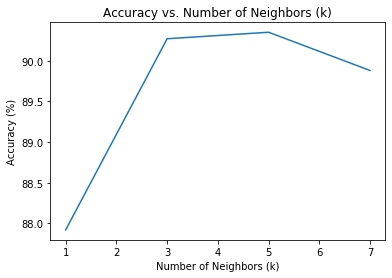

In [88]:
#Knn Classifier 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)


percentages = []
kvalues = [1, 3, 5,7]
for k in kvalues:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    prediction = knn_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, prediction)
    percentages.append(round(100 * accuracy, 2))
    print("The Accuracy of the KNN classifier at k =", k, "is (%):", round(100 * accuracy, 2))


plt.plot(kvalues, percentages)
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.show()
    

In [89]:
#Taking k as 5


data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']  

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)
prediction = knn_classifier.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy of the KNN classifier at k = 5  is (%):", round(100 * accuracy, 2))
print("The Confusion Matrix of the KNN classifier at k = 5  is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )




The Accuracy of the KNN classifier at k = 5  is (%): 90.35
The Confusion Matrix of the KNN classifier at k = 5  is (%):
 [[1092   16]
 [ 107   60]]
TPR: 0.99
TNR: 0.36


In [90]:
#Ada boost
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC


data = churn 

cat_features = ['international_plan','voice_mail_plan']
num_features = ['account_length',
        'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'] 

# Encode categorical features
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature].astype(str))

# Combine categorical and numerical features
features = cat_features + num_features
#top_features = ['total_day_minutes', 'number_customer_service_calls', 'total_day_charge', 'international_plan']
#features = top_features


X = data[features].values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
le = LabelEncoder()
Y = le.fit_transform(data['churn'].values)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)



svc = SVC(probability=True, kernel='linear')
lr = LogisticRegression()
nb = GaussianNB()
rf = RandomForestClassifier(n_estimators=14, max_depth=9, criterion='entropy')


svc = SVC(probability=True, kernel='linear')
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=0.5 , base_estimator=lr)
adaboost = adaboost.fit(X_train, Y_train)

prediction = adaboost.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
cm = confusion_matrix(Y_test, prediction)

print("The Accuracy of the ada classifier at k = 5  is (%):", round(100 * accuracy, 2))
print("The Confusion Matrix of the ada classifier at k = 5  is (%):\n", cm)

#Tpr or sensitivity
TPR = cm[0][0] / (cm[0][0] + cm[0][1])
print("TPR:", round(TPR, 2) )

#TNR or Specificity
TNR = cm[1][1] / (cm[1][0] + cm[1][1])
print("TNR:", round(TNR , 2) )


The Accuracy of the ada classifier at k = 5  is (%): 87.14
The Confusion Matrix of the ada classifier at k = 5  is (%):
 [[1072   36]
 [ 128   39]]
TPR: 0.97
TNR: 0.23
